In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
class KMClusters:
  def __init__(self, data, K, tolerance = 0.0001, max_iter = 200):
    self.K = K
    self.tolerance = tolerance    
    self.max_iter = max_iter
    self.rows = data.shape[0]
    self.columns = data.shape[1]


  def random_centroids(self, data):   
    '''
    Takes in data in an array format and outputs K randomized centroids from the data
    ''' 
    random_idx = np.random.permutation(self.rows)[:self.K]
    centroids = data[random_idx] 
    return centroids

  def create_clusters(self, data):
    '''
    Takes in data in an array format, returns list of clusters. Each cluster is a list of
    indices of data point that belong to respective clusters.
    '''
    clusters = [[] for _ in range(self.K)]
    for point_idx, point in enumerate(data):
      closest_idx =np.argmin([np.linalg.norm(data-centroid) for centroid in self.random_centroids(data)])
      clusters[closest_idx].append(point_idx)    
    return clusters

  def new_centroids(self, data):
    '''
    Takes in data in an array format, returns updated centroids of each cluster.
    '''
    centroids = np.zeros((self.K, self.columns))
    clusters = self.create_clusters(data)

    for idx, cluster in enumerate(clusters):
      new_centroid = np.mean(data[cluster], axis = 0)
      centroids[idx] = new_centroid
    return centroids

  #def new_centroids(self, data):
  #  updated_centroid = []
  #  for i in range(len(self.create_clusters(data))):
  #    z = list(np.mean(data[clusters[i]], axis = 0))
  #    updated_centroid.append(z)
  #    new_centroids = np.array(updated_centroid)
  #  return new_centroids

  def predict(self, data):
    '''
    Takes in data, returns cluster group prediction.
    '''
    predictions = np.zeros(self.rows)
    clusters = self.create_clusters(data)

    for idx, cluster in enumerate(clusters):
      for i in cluster:
        predictions[i] = idx
    return predictions

  def fit(self, data):
    '''
    Takes in data, returns optimized predictions, list of cluster lits and updated centroids
    '''
    centroids = self.random_centroids(data)
    
    optimized = True
    for i in range(self.max_iter):
      clusters = self.create_clusters(data)

      prev_centroids = centroids
      centroids = self.new_centroids(data)

      if np.sum((centroids - prev_centroids)/prev_centroids * 100) > self.tolerance:
        optimized = False

      if optimized:
        break

    y_preds = self.predict(data)
    return y_preds, clusters, centroids

In [5]:
# Sample data

df = pd.read_csv('https://raw.githubusercontent.com/JenBanks8585/KMeans_project/main/winequality-red.csv')
df.head()
df1 = df.sample(frac = .2)
df1 = np.array(df1[['fixed acidity', 'volatile acidity']])


In [6]:
# Try it out, create an instance, fit and predict, then graph results

clf1 = KMClusters(K = 4, data = df1)
clf1.fit(df1)
pred = clf1.predict(df1)

mydf = pd.DataFrame({'x':df1[:,0], 'y':df1[:,1], 'pred':pred})
mydf.head()

,x,y,pred
0,7.8,0.480,3.0
1,8.5,0.490,0.0
2,5.6,0.615,2.0
3,7.5,0.550,2.0
4,5.5,0.490,3.0


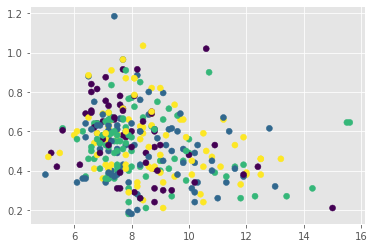

In [7]:
plt.scatter(mydf['x'], mydf['y'], c = mydf['pred'], cmap= 'viridis');

## In comparison to the real clustering module

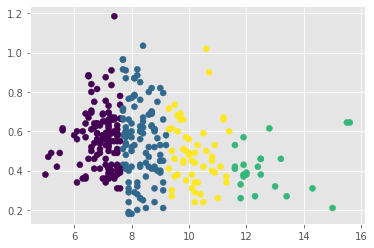

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)

clusters = kmeans.predict(df1)
plt.scatter(*df1.T, c = clusters, cmap = 'viridis');